<a href="https://colab.research.google.com/github/RomanKuliievych/datasience/blob/main/fashion_classification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %matplotlib inline

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

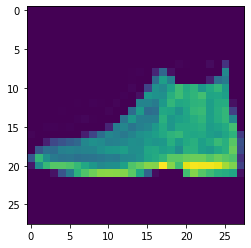

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
x_train, x_test = x_train/255, x_test/255


In [ ]:
x_train[0][8:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.00392157, 0.        , 0.78431373, 0.90980392,
        0.90980392, 0.91372549, 0.89803922, 0.8745098 , 0.8745098 ,
        0.84313725, 0.83529412, 0.64313725, 0.49803922, 0.48235294,
        0.76862745, 0.89803922, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.71764706, 0.88235294,
        0.84705882, 0.8745098 , 0.89411765, 0.92156863, 0.89019608,
        0.87843137, 0.87058824, 0.87843137, 0.86666667, 0.8745098 ,
        0.96078431, 0.67843137, 0.        ]])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(10))

In [ ]:
first_img = x_test[0].reshape((1, 28, 28))
model.predict(first_img)

array([[ -6.4145827, -14.443468 ,  -4.193734 ,  -4.8912153,  -4.87914  ,
          5.9403043,  -2.3993673,   5.0922213,   1.5737727,   7.8004975]],
      dtype=float32)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3816 - accuracy: 0.8655 - val_loss: 0.3802 - val_accuracy: 0.8647
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3787 - accuracy: 0.8665 - val_loss: 0.3828 - val_accuracy: 0.8644
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8664 - val_loss: 0.3866 - val_accuracy: 0.8611
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8674 - val_loss: 0.3861 - val_accuracy: 0.8658
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8691 - val_loss: 0.3872 - val_accuracy: 0.8652
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8683 - val_loss: 0.3943 - val_accuracy: 0.8622
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.8699 - val_loss: 0.4006 - val_accuracy:

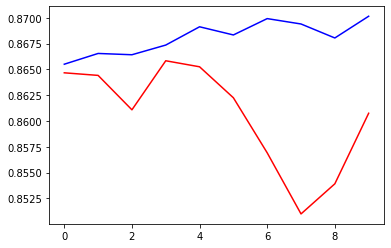

In [ ]:
plt.plot(history.epoch, history.history['accuracy'], 'b', history.epoch, history.history['val_accuracy'], 'r')

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8420


[0.4522552788257599, 0.8420000076293945]

In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


# second round

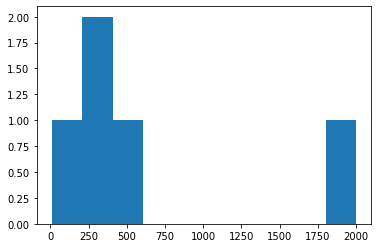

In [ ]:
x = [300, 400, 500, 2000, 10]

plt.hist(x)

plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd


np.set_printoptions(suppress=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6138b4b910>]],
      dtype=object)

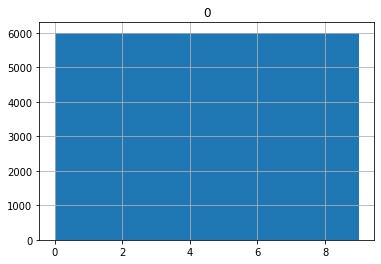

In [ ]:
df = pd.DataFrame(y_train)
df.hist()

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

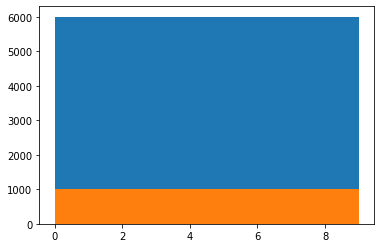

In [ ]:
plt.hist(y_train, bins=10)
plt.hist(y_test)

In [ ]:
norm_layer = layers.Normalization(axis=None)
norm_layer.adapt(x_test)

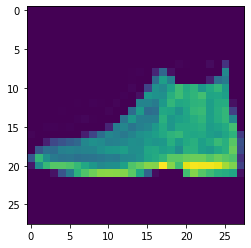

In [ ]:
plt.imshow(norm_layer(x_test[0])[0])

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(1, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 1)        0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 169)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1700      
                                                                 
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

In [ ]:
history = model.fit(x_train, y_train, epochs=1, validation_split=0.2)

1500/1500 [==============================] - 14s 9ms/step - loss: 0.5408 - accuracy: 0.8098 - val_loss: 0.5093 - val_accuracy: 0.8209


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5386 - accuracy: 0.8062


[0.5385697484016418, 0.8062000274658203]

In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
correct_pred = 0
incorrect_pred = 0
for y, y_pred in zip(y_test, y_predicted):
    pred_number = np.argmax(y_pred)
    if pred_number == y:
        correct_pred+=1
    else:
        incorrect_pred+=1

accuracy = correct_pred / (correct_pred + incorrect_pred)

# Third round
> 90% accuracy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
model_3 = keras.Sequential()
model_3.add(layers.Rescaling(scale=1/255))
model_3.add(layers.Conv2D(4, 3, activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D())
model_3.add(layers.Conv2D(16, 3, activation='relu'))
model_3.add(layers.MaxPooling2D())
model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_3.predict(x_test[:2])

array([[0.08627516, 0.09566721, 0.10656734, 0.10184603, 0.09144346,
        0.11567432, 0.10618577, 0.11051411, 0.07269781, 0.11312877],
       [0.0763955 , 0.10355595, 0.11093804, 0.11416093, 0.07185068,
        0.12863842, 0.1214961 , 0.09460736, 0.06015211, 0.11820482]],
      dtype=float32)

In [ ]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']    
    )

In [ ]:
history = model_3.fit(
    x_train, y_train, epochs=10, 
    validation_split=0.2, 
    callbacks=keras.callbacks.EarlyStopping(patience=5)
    )

Epoch 1/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.5765 - accuracy: 0.7856 - val_loss: 0.4516 - val_accuracy: 0.8352
Epoch 2/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.4527 - accuracy: 0.8326 - val_loss: 0.4054 - val_accuracy: 0.8531
Epoch 3/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.4082 - accuracy: 0.8501 - val_loss: 0.3600 - val_accuracy: 0.8695
Epoch 4/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3776 - accuracy: 0.8610 - val_loss: 0.3455 - val_accuracy: 0.8752
Epoch 5/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3569 - accuracy: 0.8687 - val_loss: 0.3375 - val_accuracy: 0.8759
Epoch 6/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3406 - accuracy: 0.8742 - val_loss: 0.3215 - val_accuracy: 0.8806
Epoch 7/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3230 - accuracy: 0.8805 - val_loss: 0.3188 -

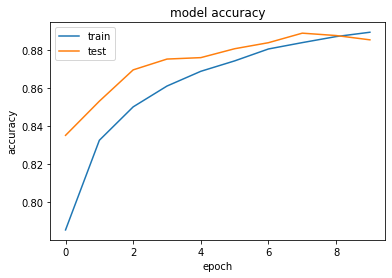

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def build_model():
    model = keras.Sequential(
        [
            # first convolution layer
            keras.layers.Conv2D(32, (3, 3), activation="relu",
                                input_shape=(28, 28, 1)),
            keras.layers.MaxPooling2D((2, 2), strides=2),
 
            # second convolution layer
            keras.layers.Conv2D(64, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((2, 2), strides=2),
 
            # fully connected classification
            # single vector
            keras.layers.Flatten(),
         
            keras.layers.Dropout(0.2),
           
            # hidden layer and output layer
            keras.layers.Dense(1024, activation="relu"),
            keras.layers.Dense(10, activation="softmax")
        ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']    
        )

    return model

In [ ]:
model = build_model()
history = model.fit(
    x_train, y_train, epochs=10, 
    validation_split=0.2, 
    callbacks=keras.callbacks.EarlyStopping(patience=5)
    )

Epoch 1/10
1500/1500 [==============================] - 188s 124ms/step - loss: 0.9419 - accuracy: 0.7845 - val_loss: 0.4307 - val_accuracy: 0.8348
Epoch 2/10
1500/1500 [==============================] - 171s 114ms/step - loss: 0.4171 - accuracy: 0.8452 - val_loss: 0.4185 - val_accuracy: 0.8409
Epoch 3/10
1500/1500 [==============================] - 190s 126ms/step - loss: 0.3600 - accuracy: 0.8644 - val_loss: 0.3279 - val_accuracy: 0.8778
Epoch 4/10
1500/1500 [==============================] - 168s 112ms/step - loss: 0.3297 - accuracy: 0.8756 - val_loss: 0.3197 - val_accuracy: 0.8827
Epoch 5/10
1500/1500 [==============================] - 172s 115ms/step - loss: 0.3030 - accuracy: 0.8849 - val_loss: 0.3248 - val_accuracy: 0.8841
Epoch 6/10
1500/1500 [==============================] - 175s 117ms/step - loss: 0.2773 - accuracy: 0.8966 - val_loss: 0.3197 - val_accuracy: 0.8851
Epoch 7/10
1500/1500 [==============================] - 175s 117ms/step - loss: 0.2604 - accuracy: 0.9022 - val_

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)            

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 36ms/step - loss: 0.3649 - accuracy: 0.8879


[0.36493757367134094, 0.8878999948501587]

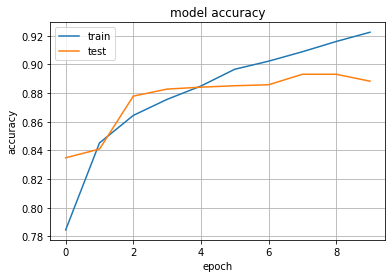

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()